In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

In [2]:
data=pd.read_csv('income_age_business.csv')

In [3]:
data.head()

,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,...,is_open,attributes,categories,hours,State_Name,State,County,City,Median_Income,mean_age
0,0,BfQ4W2cNB2ZSd7yaAhE_BA,PHS Pop Up Garden,1438 South St,Philadelphia,PA,19146,39.943584,-75.166900,4.5,...,0,"{'BusinessAcceptsCreditCards': 'True', 'Alcoho...","Parks, Active Life, Beer Gardens, Mexican, Loc...","{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'...",Pennsylvania,PA,Adams County,Philadelphia,300000.0,42
1,1,amqruwbDGCcyu55p2pTjMA,Flying Fish Crafthouse,1363 N 31st St,Philadelphia,PA,19121,39.977584,-75.185308,3.0,...,0,"{'WheelchairAccessible': 'True', 'WiFi': ""u'fr...","Food, Breweries, Restaurants, Bars, Beer Bar, ...","{'Wednesday': '16:0-0:0', 'Thursday': '16:0-0:...",Pennsylvania,PA,Adams County,Philadelphia,300000.0,37
2,2,mLDc_u44EiqJCSR3L4nQZw,Attic Brewing Company,137 Berkley St,Philadelphia,PA,19144,40.022987,-75.161698,4.5,...,1,"{'RestaurantsDelivery': 'True', 'OutdoorSeatin...","Food, Nightlife, Brewpubs, Bars, Beer Bar, Bre...","{'Monday': '16:0-21:0', 'Tuesday': '16:0-21:0'...",Pennsylvania,PA,Adams County,Philadelphia,300000.0,41
3,3,ltaDKBb6_PMAOAXthRFKLA,Alma Mater,7165 Germantown Ave,Philadelphia,PA,19119,40.060177,-75.190676,2.0,...,0,"{'OutdoorSeating': 'True', 'Alcohol': ""u'full_...","Restaurants, American (Traditional), American ...","{'Monday': '7:0-2:0', 'Tuesday': '7:0-2:0', 'W...",Pennsylvania,PA,Adams County,Philadelphia,300000.0,41
4,4,xEaNFfbt5V3evb7H2XFX-A,Brewery ARS,1927 W Passyunk Ave,Philadelphia,PA,19145,39.923956,-75.178875,4.5,...,1,"{'RestaurantsPriceRange2': '1', 'BusinessParki...","Breweries, Beer, Wine & Spirits, Food","{'Wednesday': '16:0-20:0', 'Thursday': '16:0-2...",Pennsylvania,PA,Adams County,Philadelphia,300000.0,42


In [4]:
data=data.drop(columns=['Unnamed: 0'])

In [5]:
# Assuming you have a column 'City' with values 'Indianapolis' and 'Philadelphia'
df_indy = data[data['state'] == 'IN']
df_philly = data[data['state'] == 'PA']



In [6]:
df_indy=df_indy.drop(columns=['State_Name','State','County','City'])
df_philly=df_philly.drop(columns=['State_Name','State','County','City'])

In [7]:
import pandas as pd
import json
from datetime import datetime


In [8]:
# Function to parse hours and calculate total open hours
def calculate_open_hours(hours_str):
    try:
        hours_dict = json.loads(hours_str.replace("'", "\""))
        total_hours = 0
        for day, times in hours_dict.items():
            if times != '0:0-0:0':  # Assuming closed days are represented as '0:0-0:0'
                open_time, close_time = times.split('-')
                fmt = '%H:%M'
                open_time = datetime.strptime(open_time, fmt)
                close_time = datetime.strptime(close_time, fmt)
                diff = close_time - open_time
                total_hours += diff.seconds / 3600  # Convert seconds to hours
        return total_hours
    except:
        return 0  #

In [9]:
# Apply the function to the 'hours' column
df_indy['total_open_hours'] = df_indy['hours'].apply(calculate_open_hours)
df_philly['total_open_hours'] = df_philly['hours'].apply(calculate_open_hours)

In [10]:
df_indy=df_indy.reset_index()
df_philly=df_philly.reset_index()


In [12]:
df_indy

,index,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,Median_Income,mean_age,total_open_hours
0,5,ejrf1eSViGaGlyoxhAqm1Q,Black Acre Garden,"5529 Bonna Ave, Ste 9",Indianapolis,IN,46219,39.766974,-86.072233,4.5,29,1,"{'HappyHour': 'True', 'Alcohol': ""u'full_bar'""...","Beer Gardens, Nightlife","{'Wednesday': '16:0-21:0', 'Thursday': '16:0-2...",300000.0,42,32.0
1,8,0lf3Nqamc_9kKpDV4ajy1g,Black Acre Brewing,5632 E Washington St,Indianapolis,IN,46219,39.770828,-86.070886,4.5,294,1,"{'OutdoorSeating': 'True', 'RestaurantsGoodFor...","Food, Bars, Breweries, Nightlife, Beer, Wine &...","{'Monday': '16:0-21:0', 'Tuesday': '16:0-21:0'...",300000.0,42,44.0
2,31,3hrEWKJxJUwEBmzw8oUYHw,Brugge Brasserie,1011 E Westfield Blvd,Indianapolis,IN,46220,39.870520,-86.141230,4.0,587,0,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pubs, Nightlife, Desserts, French, Belgi...","{'Monday': '0:0-0:0', 'Wednesday': '16:0-20:0'...",147106.0,39,20.0
3,32,hOVphvLElFBXKDArFRgUvQ,Liter House,5301 Winthrop Ave,Indianapolis,IN,46220,39.849360,-86.141309,4.0,200,1,"{'NoiseLevel': ""u'average'"", 'CoatCheck': 'Fal...","Bars, Restaurants, American (New), Caterers, B...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-18:0', ...",147106.0,39,42.0
4,33,Lx7mtvmJbkMT9Q9W2YwyBA,Barley Island Restaurant and Brewhouse,701 Broad Ripple Ave,Indianapolis,IN,46220,39.869585,-86.145850,3.0,10,0,"{'GoodForKids': 'True', 'RestaurantsPriceRange...","Food, Breweries, Restaurants, American (Tradit...","{'Monday': '11:0-0:0', 'Tuesday': '11:0-0:0', ...",147106.0,39,92.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,177,VBPY0IofMYlRAcynvxgS2g,Alcatraz Brewing Company,49 W Maryland St,Indianapolis,IN,46204,39.766304,-86.159322,3.0,21,0,"{'BusinessAcceptsCreditCards': 'True', 'Outdoo...","Restaurants, Burgers, Food, Breweries",NaN,9146.0,47,0.0
78,178,PT-1mnyFbkBIeJTKyGaLvQ,Indy Brew Bus,NaN,Indianapolis,IN,46204,39.771343,-86.157371,4.5,44,1,"{'RestaurantsPriceRange2': '2', 'RestaurantsDe...","Event Planning & Services, Tours, Breweries, H...","{'Monday': '13:0-21:0', 'Tuesday': '13:0-21:0'...",9146.0,47,53.0
79,179,IcqvNEGpi94KcvpS_wUBRQ,The Tap,306 N Delaware St,Indianapolis,IN,46204,39.771440,-86.154574,4.0,465,1,"{'HappyHour': 'False', 'Music': ""{'dj': False,...","Restaurants, Breweries, American (Traditional)...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-23:0', ...",9146.0,47,73.0
80,180,G1280tTnHsioeQHTaWyK3w,Rock Bottom Restaurant & Brewery,10 West Washington,Indianapolis,IN,46204,39.767299,-86.158755,3.5,357,0,"{'BikeParking': 'True', 'RestaurantsReservatio...","Restaurants, Breweries, Food, Bars, Burgers, P...","{'Monday': '12:0-20:0', 'Tuesday': '12:0-20:0'...",9146.0,47,58.0


In [13]:
import ast

# Function to convert string representation of a dictionary to a dictionary
def str_to_dict(s):
    try:
        return ast.literal_eval(s)
    except ValueError:
        return s



In [14]:
df_indy['attributes'] = df_indy['attributes'].apply(str_to_dict)
df_philly['attributes'] = df_philly['attributes'].apply(str_to_dict)



In [15]:
indi_attributes_expanded = df_indy['attributes'].apply(pd.Series)


df_indy = df_indy.drop('attributes', axis=1).join(indi_attributes_expanded)


print(df_indy.shape)


(82, 50)


In [16]:
philly_attributes_expanded = df_philly['attributes'].apply(pd.Series)


df_philly = df_philly.drop('attributes', axis=1).join(philly_attributes_expanded)


print(df_philly.shape)


(100, 51)


In [17]:
# Selecting only the specified columns
columns_to_keep = ['business_id', 'name', 'address', 'city', 'state', 'postal_code', 
                   'latitude', 'longitude', 'stars', 'review_count', 'is_open', 'categories', 'hours', 'Median_Income', 'mean_age', 
                   'total_open_hours', 'HappyHour', 'OutdoorSeating', 
                   'RestaurantsPriceRange2', 'WiFi', 'BikeParking', 'HasTV', 
                   'DogsAllowed', 'Alcohol']


In [18]:
df_indy = df_indy[columns_to_keep]
df_philly =df_philly[columns_to_keep]

In [19]:
# Convert boolean strings to actual boolean values where applicable
boolean_attrs = ['HappyHour', 'OutdoorSeating', 'BikeParking', 'HasTV', 'DogsAllowed']
for attr in boolean_attrs:
    df_indy[attr] = df_indy[attr].replace({'True': True, 'False': False})
    df_philly[attr] = df_philly[attr].replace({'True': True, 'False': False})


In [20]:
def categorize_alcohol(alcohol_type):
    if alcohol_type in ["'full_bar'", "u'full_bar'"]:
        return True, False  # full_bar is True, beer_wine is False
    elif alcohol_type in ["'beer_and_wine'", "u'beer_and_wine'"]:
        return False, True  # full_bar is False, beer_wine is True
    else:
        return False, False  # Neither full_bar nor beer_wine for NaN or other values


In [21]:
# Apply the function to each row in the DataFrame
df_indy['full_bar'], df_indy['beer_wine'] = zip(*df_indy['Alcohol'].apply(categorize_alcohol))


In [22]:
df_indy.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,HappyHour,OutdoorSeating,RestaurantsPriceRange2,WiFi,BikeParking,HasTV,DogsAllowed,Alcohol,full_bar,beer_wine
0,ejrf1eSViGaGlyoxhAqm1Q,Black Acre Garden,"5529 Bonna Ave, Ste 9",Indianapolis,IN,46219,39.766974,-86.072233,4.5,29,...,True,True,NaN,u'free',True,False,NaN,u'full_bar',True,False
1,0lf3Nqamc_9kKpDV4ajy1g,Black Acre Brewing,5632 E Washington St,Indianapolis,IN,46219,39.770828,-86.070886,4.5,294,...,NaN,True,2,NaN,True,False,False,u'beer_and_wine',False,True
2,3hrEWKJxJUwEBmzw8oUYHw,Brugge Brasserie,1011 E Westfield Blvd,Indianapolis,IN,46220,39.870520,-86.141230,4.0,587,...,False,True,2,u'no',True,True,True,u'beer_and_wine',False,True
3,hOVphvLElFBXKDArFRgUvQ,Liter House,5301 Winthrop Ave,Indianapolis,IN,46220,39.849360,-86.141309,4.0,200,...,True,True,2,u'free',True,True,False,u'full_bar',True,False
4,Lx7mtvmJbkMT9Q9W2YwyBA,Barley Island Restaurant and Brewhouse,701 Broad Ripple Ave,Indianapolis,IN,46220,39.869585,-86.145850,3.0,10,...,NaN,True,2,NaN,NaN,True,NaN,NaN,False,False


In [23]:
# Apply the function to each row in the DataFrame
df_philly['full_bar'], df_philly['beer_wine'] = zip(*df_philly['Alcohol'].apply(categorize_alcohol))

# Display the DataFrame with the new columns
print(df_philly.head())

              business_id                    name              address  \
0  BfQ4W2cNB2ZSd7yaAhE_BA       PHS Pop Up Garden        1438 South St   
1  amqruwbDGCcyu55p2pTjMA  Flying Fish Crafthouse       1363 N 31st St   
2  mLDc_u44EiqJCSR3L4nQZw   Attic Brewing Company       137 Berkley St   
3  ltaDKBb6_PMAOAXthRFKLA              Alma Mater  7165 Germantown Ave   
4  xEaNFfbt5V3evb7H2XFX-A             Brewery ARS  1927 W Passyunk Ave   

           city state  postal_code   latitude  longitude  stars  review_count  \
0  Philadelphia    PA        19146  39.943584 -75.166900    4.5           186   
1  Philadelphia    PA        19121  39.977584 -75.185308    3.0           129   
2  Philadelphia    PA        19144  40.022987 -75.161698    4.5            27   
3  Philadelphia    PA        19119  40.060177 -75.190676    2.0            26   
4  Philadelphia    PA        19145  39.923956 -75.178875    4.5            53   

   ...  HappyHour OutdoorSeating RestaurantsPriceRange2     WiFi  Bi

In [24]:
df_indy['beer_wine']=True
df_philly['beer_wine'] = True

In [25]:
df_indy

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,HappyHour,OutdoorSeating,RestaurantsPriceRange2,WiFi,BikeParking,HasTV,DogsAllowed,Alcohol,full_bar,beer_wine
0,ejrf1eSViGaGlyoxhAqm1Q,Black Acre Garden,"5529 Bonna Ave, Ste 9",Indianapolis,IN,46219,39.766974,-86.072233,4.5,29,...,True,True,NaN,u'free',True,False,NaN,u'full_bar',True,True
1,0lf3Nqamc_9kKpDV4ajy1g,Black Acre Brewing,5632 E Washington St,Indianapolis,IN,46219,39.770828,-86.070886,4.5,294,...,NaN,True,2,NaN,True,False,False,u'beer_and_wine',False,True
2,3hrEWKJxJUwEBmzw8oUYHw,Brugge Brasserie,1011 E Westfield Blvd,Indianapolis,IN,46220,39.870520,-86.141230,4.0,587,...,False,True,2,u'no',True,True,True,u'beer_and_wine',False,True
3,hOVphvLElFBXKDArFRgUvQ,Liter House,5301 Winthrop Ave,Indianapolis,IN,46220,39.849360,-86.141309,4.0,200,...,True,True,2,u'free',True,True,False,u'full_bar',True,True
4,Lx7mtvmJbkMT9Q9W2YwyBA,Barley Island Restaurant and Brewhouse,701 Broad Ripple Ave,Indianapolis,IN,46220,39.869585,-86.145850,3.0,10,...,NaN,True,2,NaN,NaN,True,NaN,NaN,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,VBPY0IofMYlRAcynvxgS2g,Alcatraz Brewing Company,49 W Maryland St,Indianapolis,IN,46204,39.766304,-86.159322,3.0,21,...,NaN,True,2,NaN,NaN,NaN,NaN,'full_bar',True,True
78,PT-1mnyFbkBIeJTKyGaLvQ,Indy Brew Bus,NaN,Indianapolis,IN,46204,39.771343,-86.157371,4.5,44,...,True,NaN,2,u'no',False,NaN,False,NaN,False,True
79,IcqvNEGpi94KcvpS_wUBRQ,The Tap,306 N Delaware St,Indianapolis,IN,46204,39.771440,-86.154574,4.0,465,...,False,True,2,u'free',True,True,True,u'full_bar',True,True
80,G1280tTnHsioeQHTaWyK3w,Rock Bottom Restaurant & Brewery,10 West Washington,Indianapolis,IN,46204,39.767299,-86.158755,3.5,357,...,True,True,2,u'free',True,True,False,'full_bar',True,True


In [26]:
df_indy=df_indy.drop(columns=['Alcohol'])
df_philly=df_philly.drop(columns=['Alcohol'])

In [27]:
df_indy.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,total_open_hours,HappyHour,OutdoorSeating,RestaurantsPriceRange2,WiFi,BikeParking,HasTV,DogsAllowed,full_bar,beer_wine
0,ejrf1eSViGaGlyoxhAqm1Q,Black Acre Garden,"5529 Bonna Ave, Ste 9",Indianapolis,IN,46219,39.766974,-86.072233,4.5,29,...,32.0,True,True,NaN,u'free',True,False,NaN,True,True
1,0lf3Nqamc_9kKpDV4ajy1g,Black Acre Brewing,5632 E Washington St,Indianapolis,IN,46219,39.770828,-86.070886,4.5,294,...,44.0,NaN,True,2,NaN,True,False,False,False,True
2,3hrEWKJxJUwEBmzw8oUYHw,Brugge Brasserie,1011 E Westfield Blvd,Indianapolis,IN,46220,39.870520,-86.141230,4.0,587,...,20.0,False,True,2,u'no',True,True,True,False,True
3,hOVphvLElFBXKDArFRgUvQ,Liter House,5301 Winthrop Ave,Indianapolis,IN,46220,39.849360,-86.141309,4.0,200,...,42.0,True,True,2,u'free',True,True,False,True,True
4,Lx7mtvmJbkMT9Q9W2YwyBA,Barley Island Restaurant and Brewhouse,701 Broad Ripple Ave,Indianapolis,IN,46220,39.869585,-86.145850,3.0,10,...,92.0,NaN,True,2,NaN,NaN,True,NaN,False,True


In [28]:
# Handling NaN values
# Example: fill NaN in 'HappyHour' with False (assuming NaN means no Happy Hour)
df_indy['HappyHour'] = df_indy['HappyHour'].fillna(False)
df_philly['HappyHour'] = df_philly['HappyHour'].fillna(False)


In [29]:
# Handling NaN values OutdoorSeating
df_indy['OutdoorSeating'] = df_indy['OutdoorSeating'].fillna(False)
df_philly['OutdoorSeating'] = df_philly['OutdoorSeating'].fillna(False)

# Handling NaN values DogsAllowed
df_indy['DogsAllowed'] = df_indy['DogsAllowed'].fillna(False)
df_philly['DogsAllowed'] = df_philly['DogsAllowed'].fillna(False)


# Handling NaN values BikeParking
df_indy['BikeParking'] = df_indy['BikeParking'].fillna(False)
df_philly['BikeParking'] = df_philly['BikeParking'].fillna(False)

# Handling NaN values HasTV
df_indy['HasTV'] = df_indy['HasTV'].fillna(False)
df_philly['HasTV'] = df_philly['HasTV'].fillna(False)


In [30]:
# Example: fill NaN in 'RestaurantsPriceRange2' with the mode
price_range_mode_indy = df_indy['RestaurantsPriceRange2'].mode()[0]
df_indy['RestaurantsPriceRange2'] = df_indy['RestaurantsPriceRange2'].fillna(price_range_mode_indy)


In [31]:
# Example: fill NaN in 'RestaurantsPriceRange2' with the mode
price_range_mode_philly = df_philly['RestaurantsPriceRange2'].mode()[0]
df_philly['RestaurantsPriceRange2'] = df_philly['RestaurantsPriceRange2'].fillna(price_range_mode_philly)


In [32]:
df_indy=df_indy.drop(columns=['WiFi'])
df_philly=df_philly.drop(columns=['WiFi'])

In [33]:
df_indy.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,mean_age,total_open_hours,HappyHour,OutdoorSeating,RestaurantsPriceRange2,BikeParking,HasTV,DogsAllowed,full_bar,beer_wine
0,ejrf1eSViGaGlyoxhAqm1Q,Black Acre Garden,"5529 Bonna Ave, Ste 9",Indianapolis,IN,46219,39.766974,-86.072233,4.5,29,...,42,32.0,True,True,2,True,False,False,True,True
1,0lf3Nqamc_9kKpDV4ajy1g,Black Acre Brewing,5632 E Washington St,Indianapolis,IN,46219,39.770828,-86.070886,4.5,294,...,42,44.0,False,True,2,True,False,False,False,True
2,3hrEWKJxJUwEBmzw8oUYHw,Brugge Brasserie,1011 E Westfield Blvd,Indianapolis,IN,46220,39.870520,-86.141230,4.0,587,...,39,20.0,False,True,2,True,True,True,False,True
3,hOVphvLElFBXKDArFRgUvQ,Liter House,5301 Winthrop Ave,Indianapolis,IN,46220,39.849360,-86.141309,4.0,200,...,39,42.0,True,True,2,True,True,False,True,True
4,Lx7mtvmJbkMT9Q9W2YwyBA,Barley Island Restaurant and Brewhouse,701 Broad Ripple Ave,Indianapolis,IN,46220,39.869585,-86.145850,3.0,10,...,39,92.0,False,True,2,False,True,False,False,True


In [34]:
df_philly.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,mean_age,total_open_hours,HappyHour,OutdoorSeating,RestaurantsPriceRange2,BikeParking,HasTV,DogsAllowed,full_bar,beer_wine
0,BfQ4W2cNB2ZSd7yaAhE_BA,PHS Pop Up Garden,1438 South St,Philadelphia,PA,19146,39.943584,-75.166900,4.5,186,...,42,54.0,True,True,2,True,False,False,True,True
1,amqruwbDGCcyu55p2pTjMA,Flying Fish Crafthouse,1363 N 31st St,Philadelphia,PA,19121,39.977584,-75.185308,3.0,129,...,37,46.0,True,True,2,True,True,False,True,True
2,mLDc_u44EiqJCSR3L4nQZw,Attic Brewing Company,137 Berkley St,Philadelphia,PA,19144,40.022987,-75.161698,4.5,27,...,41,48.0,False,True,2,False,False,False,False,True
3,ltaDKBb6_PMAOAXthRFKLA,Alma Mater,7165 Germantown Ave,Philadelphia,PA,19119,40.060177,-75.190676,2.0,26,...,41,133.0,True,True,2,True,True,True,True,True
4,xEaNFfbt5V3evb7H2XFX-A,Brewery ARS,1927 W Passyunk Ave,Philadelphia,PA,19145,39.923956,-75.178875,4.5,53,...,42,22.0,False,False,1,True,False,True,False,True


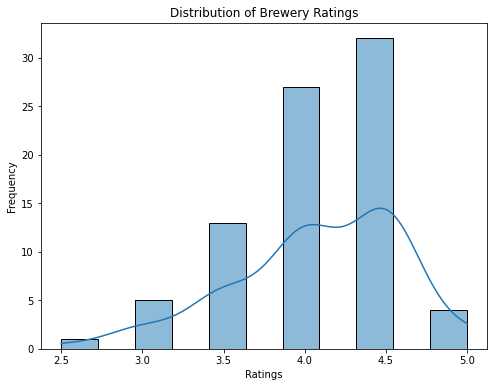

In [35]:
# EDA: Visualizing distribution of ratings
plt.figure(figsize=(8, 6))
sns.histplot(df_indy['stars'], kde=True)
plt.title('Distribution of Brewery Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

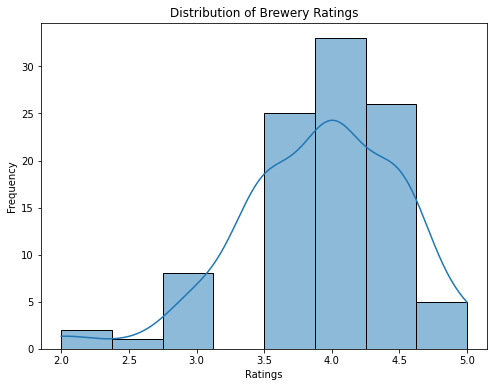

In [36]:
# EDA: Visualizing distribution of ratings
plt.figure(figsize=(8, 6))
sns.histplot(df_philly['stars'], kde=True)
plt.title('Distribution of Brewery Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

In [37]:
df_indy.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'categories', 'hours', 'Median_Income', 'mean_age', 'total_open_hours',
       'HappyHour', 'OutdoorSeating', 'RestaurantsPriceRange2', 'BikeParking',
       'HasTV', 'DogsAllowed', 'full_bar', 'beer_wine'],
      dtype='object')

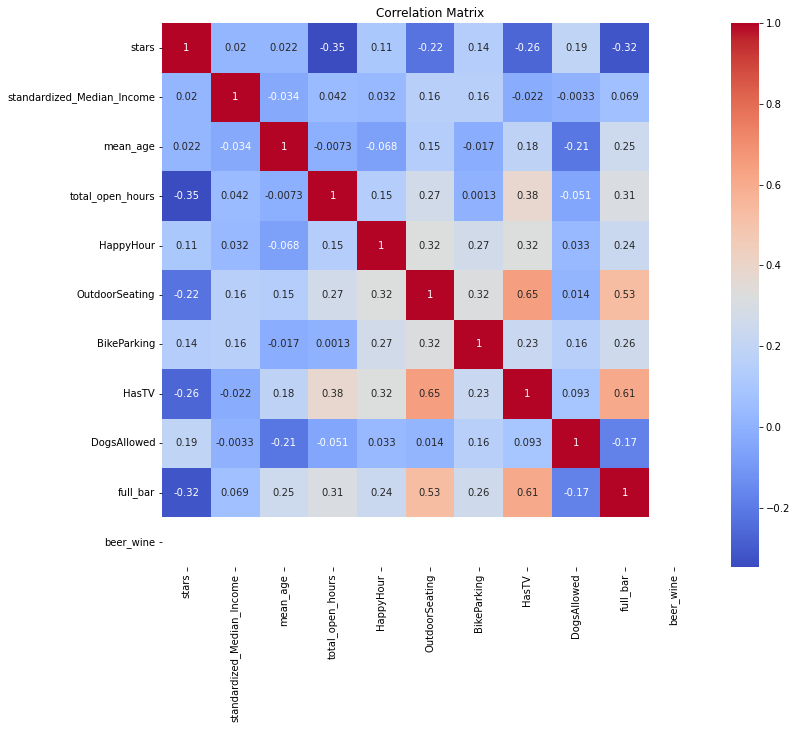

In [38]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_indy is your DataFrame

# Selecting columns to standardize
cols_to_standardize = ['Median_Income', 'review_count']

# Standardization
scaler = StandardScaler()
# Apply standardization and create new columns
for col in cols_to_standardize:
    df_indy['standardized_' + col] = scaler.fit_transform(df_indy[[col]])

# Selecting columns for correlation analysis
new_cols_for_corr = ['stars', 'standardized_Median_Income', 'mean_age', 'total_open_hours', 
                     'HappyHour', 'OutdoorSeating', 'BikeParking', 'HasTV', 
                     'DogsAllowed', 'full_bar', 'beer_wine']

# Compute the correlation matrix
corr_matrix = df_indy[new_cols_for_corr].corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


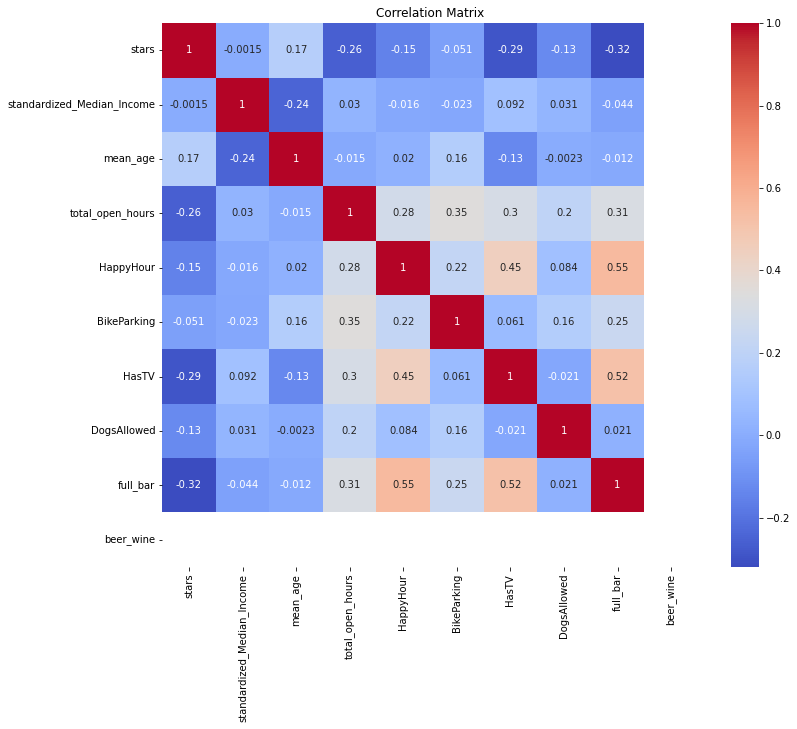

In [39]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_indy is your DataFrame

# Selecting columns to standardize
cols_to_standardize = ['Median_Income', 'review_count']

# Standardization
scaler = StandardScaler()
# Apply standardization and create new columns
for col in cols_to_standardize:
    df_philly['standardized_' + col] = scaler.fit_transform(df_philly[[col]])

# Selecting columns for correlation analysis
new_cols_for_corr = ['stars', 'standardized_Median_Income', 'mean_age', 'total_open_hours', 
                     'HappyHour', 'OutdoorSeating', 'BikeParking', 'HasTV', 
                     'DogsAllowed', 'full_bar', 'beer_wine']

# Compute the correlation matrix
corr_matrix = df_philly[new_cols_for_corr].corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### Goal: Understand how attributes like HappyHour, OutdoorSeating, etc., influence the stars (ratings).

### Steps for Analysis:

Descriptive Statistics: Begin with basic statistics to understand the distribution of ratings across different attribute categories.

Grouped Analysis: Group the data by each attribute and calculate the average rating for each group.

Statistical Testing: Perform statistical tests to see if the differences in ratings are statistically significant.

#### T-test/ANOVA: Use if the attribute is binary/categorical. For example, use a t-test to compare ratings between breweries with and without HappyHour.

#### Visualization: Create bar charts or box plots to visualize the relationship between attributes and ratings.

### Indy Analysis 

In [40]:
import pandas as pd
from scipy.stats import ttest_ind

# Assuming 'df' is your DataFrame

# Grouped Analysis for HappyHour
grouped_by_happyhour = df_indy.groupby('HappyHour')['stars'].mean()

# T-test for HappyHour
happy_hour = df_indy[df_indy['HappyHour'] == True]['stars']
no_happy_hour = df_indy[df_indy['HappyHour'] == False]['stars']
t_stat, p_val = ttest_ind(happy_hour, no_happy_hour)

print("Average Ratings by HappyHour:", grouped_by_happyhour)
print("T-test HappyHour - t-statistic:", t_stat, "p-value:", p_val)



# Grouped Analysis for HappyHour
grouped_by_OutdoorSeating = df_indy.groupby('OutdoorSeating')['stars'].mean()

# T-test for HappyHour
OutdoorSeating = df_indy[df_indy['OutdoorSeating'] == True]['stars']
no_OutdoorSeating= df_indy[df_indy['OutdoorSeating'] == False]['stars']
t_stat, p_val = ttest_ind(OutdoorSeating, no_OutdoorSeating)

print("Average Ratings by OutdoorSeating:", grouped_by_OutdoorSeating)
print("T-test OutdoorSeating - t-statistic:", t_stat, "p-value:", p_val)



# Assuming 'df' is your DataFrame

# Grouped Analysis for HappyHour
grouped_by_full_bar = df_indy.groupby('full_bar')['stars'].mean()

# T-test for HappyHour
full_bar = df_indy[df_indy['full_bar'] == True]['stars']
no_full_bar = df_indy[df_indy['full_bar'] == False]['stars']
t_stat, p_val = ttest_ind(full_bar, no_full_bar)

print("Average Ratings by full_bar:", grouped_by_full_bar)
print("T-test full_bar - t-statistic:", t_stat, "p-value:", p_val)



Average Ratings by HappyHour: HappyHour
False    4.050847
True     4.173913
Name: stars, dtype: float64
T-test HappyHour - t-statistic: 0.9623156672946507 p-value: 0.3387908037669263
Average Ratings by OutdoorSeating: OutdoorSeating
False    4.205128
True     3.976744
Name: stars, dtype: float64
T-test OutdoorSeating - t-statistic: -2.0237929042042615 p-value: 0.04632993966330298
Average Ratings by full_bar: full_bar
False    4.203704
True     3.857143
Name: stars, dtype: float64
T-test full_bar - t-statistic: -2.9998153687152334 p-value: 0.0036003557293667657


In [43]:
# T-test for HappyHour
# Grouped Analysis for HappyHour
grouped_by_dogs_allowed = df_indy.groupby('DogsAllowed')['stars'].mean()
dogs_allowed = df_indy[df_indy['DogsAllowed'] == True]['stars']
no_dogs_allowed = df_indy[df_indy['DogsAllowed'] == False]['stars']
t_stat, p_val = ttest_ind(dogs_allowed, no_dogs_allowed)

print("Average Ratings by DogsAllowed:", grouped_by_dogs_allowed)
print("T-test DogsAllowed - t-statistic:", t_stat, "p-value:", p_val)


Average Ratings by DogsAllowed: DogsAllowed
False    4.009615
True     4.216667
Name: stars, dtype: float64
T-test DogsAllowed - t-statistic: 1.7590263439145197 p-value: 0.08239667857568965


In [44]:
# T-test for HappyHour
# Grouped Analysis for HappyHour
grouped_by_HasTV = df_indy.groupby('HasTV')['stars'].mean()
HasTV = df_indy[df_indy['HasTV'] == True]['stars']
no_HasTV = df_indy[df_indy['HasTV'] == False]['stars']
t_stat, p_val = ttest_ind(HasTV, no_HasTV)

print("Average Ratings by HasTV:", grouped_by_HasTV)
print("T-test HasTV - t-statistic:", t_stat, "p-value:", p_val)


Average Ratings by HasTV: HasTV
False    4.206522
True     3.930556
Name: stars, dtype: float64
T-test HasTV - t-statistic: -2.458034343679182 p-value: 0.01613059569964219


### Interpretation
HappyHour Analysis
Average Ratings:
With HappyHour: 4.17
Without HappyHour: 4.05
T-test Results:
T-statistic: 0.962
P-value: 0.339
Interpretation: Breweries with HappyHour feature slightly higher average ratings than those without. However, the T-test's p-value is greater than the typical alpha level of 0.05, indicating that this difference is not statistically significant. This suggests that while HappyHour might be a positive feature, it does not have a strong impact on the overall customer ratings.

OutdoorSeating Analysis
Average Ratings:
With OutdoorSeating: 3.98
Without OutdoorSeating: 4.21
T-test Results:
T-statistic: -2.024
P-value: 0.046
Interpretation: Surprisingly, breweries with OutdoorSeating are rated lower on average compared to those without. The T-test shows a p-value slightly below 0.05, suggesting that this result could be statistically significant. This might indicate that while OutdoorSeating is an attractive feature, other factors associated with it (e.g., noise, comfort) could be impacting customer satisfaction negatively.

Full Bar Analysis
Average Ratings:
With a full bar: 3.86
Without a full bar: 4.20
T-test Results:
T-statistic: -2.999
P-value: 0.0036
Interpretation: Breweries with a full bar have significantly lower average ratings than those without. The low p-value in the T-test indicates that this is statistically significant. This might suggest that the presence of a full bar could be associated with factors that do not align with the preferences of the brewery-going audience in Indianapolis, such as a different atmosphere or clientele.

Overall Narrative
In Indianapolis, the presence of HappyHour doesn't significantly influence brewery ratings, while OutdoorSeating and a full bar appear to be linked with lower customer ratings. This might suggest that customers of breweries in this city value aspects other than these particular amenities, or that these features come with other aspects that negatively impact customer satisfaction. This insight could guide brewery owners in focusing on other areas of improvement or marketing, perhaps emphasizing the quality of brews, service, or overall ambiance over these specific features.

In [45]:
import pandas as pd
from scipy.stats import ttest_ind

# Assuming 'df' is your DataFrame

# Grouped Analysis for HappyHour
grouped_by_happyhour_philly = df_philly.groupby('HappyHour')['stars'].mean()

# T-test for HappyHour
happy_hour_philly = df_philly[df_philly['HappyHour'] == True]['stars']
no_happy_hour_philly = df_philly[df_philly['HappyHour'] == False]['stars']
t_stat, p_val = ttest_ind(happy_hour_philly, no_happy_hour_philly)

print("Average Ratings by HappyHour:", grouped_by_happyhour_philly)
print("T-test HappyHour - t-statistic:", t_stat, "p-value:", p_val)




# Grouped Analysis for OutdoorSeating
grouped_by_OutdoorSeating_philly = df_philly.groupby('OutdoorSeating')['stars'].mean()

# T-test for OutdoorSeating
OutdoorSeating_philly = df_philly[df_philly['OutdoorSeating'] == True]['stars']
no_OutdoorSeating_philly= df_philly[df_philly['OutdoorSeating'] == False]['stars']
t_stat, p_val = ttest_ind(OutdoorSeating_philly, no_OutdoorSeating_philly)

print("Average Ratings by OutdoorSeating:", grouped_by_OutdoorSeating_philly)
print("T-test OutdoorSeating - t-statistic:", t_stat, "p-value:", p_val)




# Grouped Analysis for full_bar
grouped_by_full_bar_philly = df_philly.groupby('full_bar')['stars'].mean()

# T-test for full_bar
full_bar_philly = df_philly[df_philly['full_bar'] == True]['stars']
no_full_bar_philly = df_philly[df_philly['full_bar'] == False]['stars']
t_stat, p_val = ttest_ind(full_bar_philly, no_full_bar_philly)

print("Average Ratings by full_bar:", grouped_by_full_bar_philly)
print("T-test full_bar - t-statistic:", t_stat, "p-value:", p_val)



Average Ratings by HappyHour: HappyHour
False    4.000000
True     3.818182
Name: stars, dtype: float64
T-test HappyHour - t-statistic: -1.5201107992857819 p-value: 0.131703027876613
Average Ratings by OutdoorSeating: OutdoorSeating
False    4.079545
True     3.781818
None     4.500000
Name: stars, dtype: float64
T-test OutdoorSeating - t-statistic: -2.5293233377322206 p-value: 0.013040059979734004
Average Ratings by full_bar: full_bar
False    4.0750
True     3.6875
Name: stars, dtype: float64
T-test full_bar - t-statistic: -3.334845815752148 p-value: 0.001206046659896171


In [46]:
# Grouped Analysis for full_bar
grouped_by_DogsAllowed_philly = df_philly.groupby('DogsAllowed')['stars'].mean()

# T-test for full_bar
DogsAllowed_philly = df_philly[df_philly['DogsAllowed'] == True]['stars']
no_DogsAllowed_philly = df_philly[df_philly['DogsAllowed'] == False]['stars']
t_stat, p_val = ttest_ind(DogsAllowed_philly, no_DogsAllowed_philly)

print("Average Ratings by DogsAllowed:", grouped_by_DogsAllowed_philly)
print("T-test DogsAllowed - t-statistic:", t_stat, "p-value:", p_val)

Average Ratings by DogsAllowed: DogsAllowed
False    3.956790
True     3.763158
Name: stars, dtype: float64
T-test DogsAllowed - t-statistic: -1.2750482623065968 p-value: 0.20530673831640614


In [47]:
# Grouped Analysis for full_bar
grouped_by_HasTV = df_philly.groupby('HasTV')['stars'].mean()

# T-test for full_bar
HasTV_philly = df_philly[df_philly['HasTV'] == True]['stars']
no_HasTV_philly = df_philly[df_philly['HasTV'] == False]['stars']
t_stat, p_val = ttest_ind(HasTV_philly, no_HasTV_philly)

print("Average Ratings by HasTV:", grouped_by_HasTV)
print("T-test HasTV - t-statistic:", t_stat, "p-value:", p_val)

Average Ratings by HasTV: HasTV
False    4.057377
True     3.705128
Name: stars, dtype: float64
T-test HasTV - t-statistic: -2.9876703966718194 p-value: 0.0035522138217966284


### Interpretation 

HappyHour Analysis in Philadelphia
Average Ratings:
With HappyHour: 3.82
Without HappyHour: 4.00
T-test Results:
T-statistic: -1.520
P-value: 0.132
Interpretation: Breweries with HappyHour are rated slightly lower than those without it in Philadelphia. However, the T-test shows a p-value greater than 0.05, indicating that this difference is not statistically significant. This suggests that HappyHour does not significantly impact the ratings of breweries in Philadelphia, similar to Indianapolis.

OutdoorSeating Analysis in Philadelphia
Average Ratings:
With OutdoorSeating: 3.78
Without OutdoorSeating: 4.08
T-test Results:
T-statistic: -2.529
P-value: 0.013
Interpretation: In Philadelphia, breweries with OutdoorSeating have significantly lower average ratings than those without it. The p-value being less than 0.05 indicates a statistically significant difference. This could mean that customers in Philadelphia might have different expectations or experiences with OutdoorSeating compared to those in Indianapolis.

Full Bar Analysis in Philadelphia
Average Ratings:
With a full bar: 3.69
Without a full bar: 4.08
T-test Results:
T-statistic: -3.335
P-value: 0.0012
Interpretation: Similar to Indianapolis, breweries with a full bar in Philadelphia also have significantly lower average ratings compared to those without. The low p-value strongly suggests this is a statistically significant difference. This could imply that the presence of a full bar might be associated with factors that negatively affect customer ratings.

Overall Narrative for Philadelphia
In Philadelphia, neither HappyHour nor OutdoorSeating nor having a full bar is associated with higher brewery ratings. In fact, OutdoorSeating and full bars are associated with lower ratings. This trend is particularly interesting for OutdoorSeating and full bars, as it contrasts with the typical expectation that these features might enhance the brewery experience. It's possible that other factors, like the atmosphere, service quality, or the type of clientele these features attract, might play a more substantial role in influencing customer satisfaction and ratings. This insight suggests that focusing on the quality of brews and overall service might be more impactful for brewery owners in Philadelphia than emphasizing these specific amenities.


## Second Analysis 

Correlation Analysis
You can use the same correlation analysis code as before, ensuring you convert RestaurantsPriceRange2 to a numerical format.

Grouped Analysis by Postal Code

In [50]:
# Convert 'RestaurantsPriceRange2' to numeric in Indianapolis dataset
df_indy['RestaurantsPriceRange2'] = pd.to_numeric(df_indy['RestaurantsPriceRange2'], errors='coerce')

# Convert 'RestaurantsPriceRange2' to numeric in Philadelphia dataset
df_philly['RestaurantsPriceRange2'] = pd.to_numeric(df_philly['RestaurantsPriceRange2'], errors='coerce')

# The 'errors' parameter is set to 'coerce' to convert any non-numeric values to NaN.
# This is useful if you have unexpected or malformed data in these columns.


In [52]:
# Grouping by postal code and calculating mean values
grouped_indy = df_indy.groupby('postal_code').agg({'stars': 'mean', 'Median_Income': 'mean', 'RestaurantsPriceRange2': 'mean'})
grouped_philly = df_philly.groupby('postal_code').agg({'stars': 'mean', 'Median_Income': 'mean', 'RestaurantsPriceRange2': 'mean'})

print("Grouped Data for Indianapolis by Postal Code:\n", grouped_indy.head())
print("\nGrouped Data for Philadelphia by Postal Code:\n", grouped_philly.head())


Grouped Data for Indianapolis by Postal Code:
                 stars  Median_Income  RestaurantsPriceRange2
postal_code                                                 
46201        4.500000        51535.0                2.000000
46202        4.307692        15203.0                1.846154
46203        4.250000        65478.0                1.666667
46204        3.964286         9146.0                1.928571
46205        4.250000        44589.0                1.833333

Grouped Data for Philadelphia by Postal Code:
                 stars  Median_Income  RestaurantsPriceRange2
postal_code                                                 
19102        3.833333        28703.0                2.000000
19103        3.800000        87311.0                2.000000
19104        3.250000        44937.0                2.000000
19106        4.000000       101360.0                1.714286
19107        3.833333        59706.0                2.000000


In [54]:
# Indianapolis
corr_matrix_indy = df_indy[['stars', 'Median_Income', 'mean_age', 'RestaurantsPriceRange2']].corr()
print("Correlation Matrix for Indianapolis:\n", corr_matrix_indy)

# Philadelphia
corr_matrix_philly = df_philly[['stars', 'Median_Income', 'mean_age', 'RestaurantsPriceRange2']].corr()
print("\nCorrelation Matrix for Philadelphia:\n", corr_matrix_philly)


Correlation Matrix for Indianapolis:
                            stars  Median_Income  mean_age  \
stars                   1.000000       0.020427  0.021724   
Median_Income           0.020427       1.000000 -0.033777   
mean_age                0.021724      -0.033777  1.000000   
RestaurantsPriceRange2 -0.142695       0.042698  0.101203   

                        RestaurantsPriceRange2  
stars                                -0.142695  
Median_Income                         0.042698  
mean_age                              0.101203  
RestaurantsPriceRange2                1.000000  

Correlation Matrix for Philadelphia:
                            stars  Median_Income  mean_age  \
stars                   1.000000      -0.001467  0.168833   
Median_Income          -0.001467       1.000000 -0.242225   
mean_age                0.168833      -0.242225  1.000000   
RestaurantsPriceRange2 -0.185365      -0.159145 -0.124418   

                        RestaurantsPriceRange2  
stars            

                        postal_code     stars  Median_Income  mean_age  \
postal_code                1.000000 -0.328587       0.064093 -0.143955   
stars                     -0.328587  1.000000       0.253506  0.398251   
Median_Income              0.064093  0.253506       1.000000  0.128919   
mean_age                  -0.143955  0.398251       0.128919  1.000000   
RestaurantsPriceRange2     0.083745 -0.264755       0.150319  0.192387   

                        RestaurantsPriceRange2  
postal_code                           0.083745  
stars                                -0.264755  
Median_Income                         0.150319  
mean_age                              0.192387  
RestaurantsPriceRange2                1.000000  


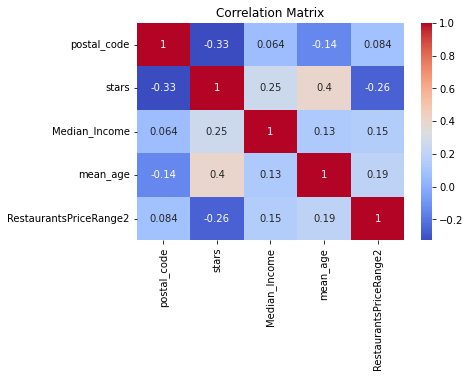

In [57]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame (replace with df_indy or df_philly as needed)

# Group data by postal code
grouped_data_indy = df_indy.groupby('postal_code').agg({
    'stars': 'mean', 
    'Median_Income': 'mean', 
    'mean_age': 'mean', 
    'RestaurantsPriceRange2': 'mean'
}).reset_index()

# Correlation analysis
correlation_matrix_indy = grouped_data_indy.corr()
print(correlation_matrix_indy)

# Visualize the correlation matrix
sns.heatmap(correlation_matrix_indy, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### Analysis Plan
Identify Breweries with High Ratings: Filter out breweries with an average rating of 4 or above.

Analyze Postal Codes: Determine which postal codes have the highest concentration of these breweries.

Price Range Analysis: Look at the common price ranges of these highly rated breweries.

Median Income Analysis: Understand the median income of the areas where these breweries are located.

In [58]:
# Filter breweries with average rating 4 or above
high_rated_indy = df_indy[df_indy['stars'] >= 4]

# Analyzing postal codes with high-rated breweries
postal_code_analysis_indy = high_rated_indy.groupby('postal_code').agg({
    'stars': 'mean', 
    'RestaurantsPriceRange2': 'mean', 
    'Median_Income': 'mean'
}).sort_values(by='stars', ascending=False)

print("Indianapolis - High Rated Breweries Analysis:")
print(postal_code_analysis_indy)


Indianapolis - High Rated Breweries Analysis:
                stars  RestaurantsPriceRange2  Median_Income
postal_code                                                 
46227        4.833333                2.000000        56716.0
46201        4.500000                2.000000        51535.0
46219        4.500000                2.000000       300000.0
46221        4.500000                1.000000        57266.0
46268        4.500000                1.666667        32428.0
46202        4.375000                1.833333        15203.0
46240        4.333333                2.000000       130418.0
46204        4.277778                1.888889         9146.0
46203        4.250000                1.666667        65478.0
46205        4.250000                1.833333        44589.0
46208        4.250000                2.000000       123102.0
46220        4.187500                1.750000       147106.0
46225        4.166667                2.000000        28400.0
46216        4.000000                2.

In [59]:
# Filter breweries with average rating 4 or above
high_rated_philly = df_philly[df_philly['stars'] >= 4]

# Analyzing postal codes with high-rated breweries
postal_code_analysis_philly = high_rated_philly.groupby('postal_code').agg({
    'stars': 'mean', 
    'RestaurantsPriceRange2': 'mean', 
    'Median_Income': 'mean'
}).sort_values(by='stars', ascending=False)

print("Philadelphia - High Rated Breweries Analysis:")
print(postal_code_analysis_philly)


Philadelphia - High Rated Breweries Analysis:
                stars  RestaurantsPriceRange2  Median_Income
postal_code                                                 
19144        4.750000                2.000000       300000.0
19128        4.750000                2.000000        97478.0
19147        4.500000                2.000000       106981.0
19107        4.500000                2.000000        59706.0
19111        4.500000                1.000000       300000.0
19146        4.500000                2.000000       300000.0
19118        4.500000                2.000000       300000.0
19130        4.500000                1.500000        36003.0
19127        4.500000                2.000000        86900.0
19106        4.375000                1.500000       101360.0
19145        4.333333                1.333333       300000.0
19122        4.285714                1.857143        32543.0
19125        4.250000                2.000000        60984.0
19129        4.250000                2.

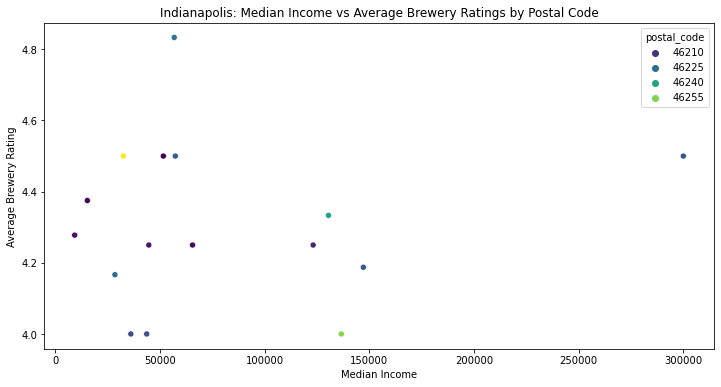

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Indianapolis Data
plt.figure(figsize=(12, 6))

# Scatter plot for Median_Income vs. Average Stars
sns.scatterplot(x='Median_Income', y='stars', data=postal_code_analysis_indy, hue='postal_code', palette='viridis')
plt.title('Indianapolis: Median Income vs Average Brewery Ratings by Postal Code')
plt.xlabel('Median Income')
plt.ylabel('Average Brewery Rating')
plt.show()



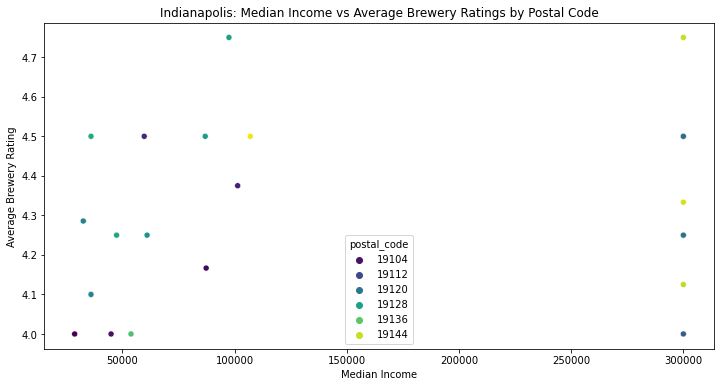

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Indianapolis Data
plt.figure(figsize=(12, 6))

# Scatter plot for Median_Income vs. Average Stars
sns.scatterplot(x='Median_Income', y='stars', data=postal_code_analysis_philly, hue='postal_code', palette='viridis')
plt.title('Indianapolis: Median Income vs Average Brewery Ratings by Postal Code')
plt.xlabel('Median Income')
plt.ylabel('Average Brewery Rating')
plt.show()



Crafting a Business Narrative
Indianapolis: A city with a diverse range of high-rated breweries across various postal codes. Business owners should note that both high and average median income areas appreciate quality breweries. The success seems less tied to the price range, suggesting a focus on quality and uniqueness could be more important.

Philadelphia: Shows a pattern of high-rated breweries in specific postal codes, with a mix of economic backgrounds. The mid-range pricing strategy appears consistent among successful breweries, indicating a balanced approach to quality and affordability.

In [ ]:
df_indy.to_csv("bus")